In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
daily_pB = pd.read_csv('Resources/daily_pB.csv',index_col=False)

In [3]:
daily_pB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 5 columns):
datestring                             2336 non-null int64
average_exhaustion                     2336 non-null float64
average_sA                             2336 non-null float64
average_percent_extracted_per_point    2336 non-null float64
pB                                     2336 non-null float64
dtypes: float64(4), int64(1)
memory usage: 91.4 KB


In [44]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = daily_pB[['average_exhaustion','average_sA','average_percent_extracted_per_point']]
y = daily_pB['pB'].values.reshape(-1,1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [10]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [11]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [15]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [16]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [17]:
grid.fit(X_train_scaled, y_train_array)

C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.603, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.598, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.610, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.603, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.598, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.610, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    3.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [18]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 10, 'gamma': 0.0001}
0.6035588921056005


In [36]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01],
             'epsilon':[0.001,0.01,0.1,1]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [37]:
grid.fit(X_train_scaled, y_train_array)

C:\Users\Adrianna\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=1, epsilon=0.001, gamma=0.0001 ................................
[CV] .... C=1, epsilon=0.001, gamma=0.0001, score=0.284, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.0001 ................................
[CV] .... C=1, epsilon=0.001, gamma=0.0001, score=0.282, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.0001 ................................
[CV] .... C=1, epsilon=0.001, gamma=0.0001, score=0.230, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.587, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.585, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.562, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1

[CV] ........ C=5, epsilon=0.1, gamma=0.01, score=0.666, total=   0.0s
[CV] C=5, epsilon=0.1, gamma=0.01 ....................................
[CV] ........ C=5, epsilon=0.1, gamma=0.01, score=0.708, total=   0.0s
[CV] C=5, epsilon=1, gamma=0.0001 ....................................
[CV] ........ C=5, epsilon=1, gamma=0.0001, score=0.352, total=   0.0s
[CV] C=5, epsilon=1, gamma=0.0001 ....................................
[CV] ........ C=5, epsilon=1, gamma=0.0001, score=0.351, total=   0.0s
[CV] C=5, epsilon=1, gamma=0.0001 ....................................
[CV] ........ C=5, epsilon=1, gamma=0.0001, score=0.329, total=   0.0s
[CV] C=5, epsilon=1, gamma=0.001 .....................................
[CV] ......... C=5, epsilon=1, gamma=0.001, score=0.571, total=   0.0s
[CV] C=5, epsilon=1, gamma=0.001 .....................................
[CV] ......... C=5, epsilon=1, gamma=0.001, score=0.574, total=   0.0s
[CV] C=5, epsilon=1, gamma=0.001 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    3.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [38]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 10, 'epsilon': 0.01, 'gamma': 0.01}
0.7037505870674713


In [30]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01],
              'degree': [1,2,3],
             'epsilon':[0.01,0.1,1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
grid.fit(X_train_scaled, y_train_array)

In [32]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 10, 'coef0': 8.943832803958488, 'degree': 3, 'epsilon': 0.01, 'gamma': 0.01}
0.6981807428459653


RBF SVR yielded the best results at 0.7037 while polynomial (3rd degree) was a close second at 0.6982. Both are significantly higher than the base regression model at 0.6085

Text(0.5, 1.0, 'Residual Plot, pB, 3-Variable & RBF Regression')

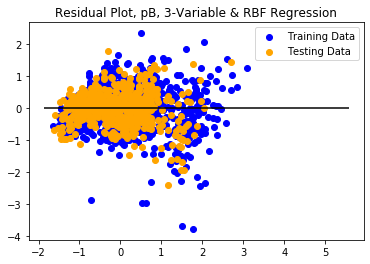

In [40]:
# Plot pB residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.01)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pB, 3-Variable & RBF Regression')

In [52]:
# Create Final Model
# Scale the full set of data first
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)

In [48]:
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [49]:
model = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.01)
coeffs = model.fit(X_scaled,y_array).coef_

AttributeError: coef_ is only available when using a linear kernel

In [61]:
model = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=0.01)

y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))


In [65]:
daily_pB['Predicted_pB'] = y_predicted

In [66]:
daily_pB['Error'] = daily_pB['Predicted_pB'] - daily_pB['pB']


,datestring,average_exhaustion,average_sA,average_percent_extracted_per_point,pB,Predicted_pB
0,20090812,47.836660,0.236600,0.675676,1.556000,1.342275
1,20090813,45.127344,0.239869,0.709220,1.324000,1.259402
2,20090814,46.250910,0.237382,0.649351,1.545000,1.263302
3,20090815,47.276493,0.238790,0.657895,1.512000,1.284463
4,20090816,45.022368,0.240766,0.617284,1.077000,1.155657
...,...,...,...,...,...,...
2331,20200320,91.697606,0.189014,0.666667,2.503250,2.800584
2332,20200323,92.262835,0.183232,0.613497,2.612667,2.706397
2333,20200324,91.541995,0.187317,0.564972,2.659333,2.750774
2334,20200325,80.328178,0.193251,0.574713,2.685667,2.440726
